In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("ts_transformed.csv")

In [93]:
df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High


In [94]:
valori_unici = df['rating_category'].unique()
print(valori_unici)

['High' 'Medium High' 'Medium' 'Medium Low' 'Low']


In [95]:
# Seleziona X: tutte le colonne tra la 2ª e la 101ª (escludi 'id' e target)
X = df.iloc[:, 1:101]

# Seleziona y: colonna target 'rating_category'
y = df['rating_category']

In [96]:
print(X.shape)  # (n_samples, 100)
print(y.value_counts())  # distribuzione classi target

(1134, 100)
rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


Essendoci solamente 10 punti per la classe meno rappresentata, quest'ultima viene aggregata alla seconda classe meno rappresentata, in modo da avere un numero di punti sufficiente per poter eseguire la classificazione.

In [97]:
# Crea una copia per sicurezza (opzionale)
y = df['rating_category'].copy()

# Unifica le classi: 'Low' → 'Medium Low'
y = y.replace({'Low': 'Medium Low'})
print(y.value_counts())

rating_category
Medium         387
High           377
Medium High    232
Medium Low     138
Name: count, dtype: int64


In [98]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.701731,-0.668877,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,0.859240,0.826150,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,0.035321,0.003613,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.188766,-0.231107,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.655819,-0.648343,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974


In [99]:
X = X.values
y_array = y.to_numpy()

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=100, stratify=y_array)

# BORF

In [102]:
from aeon.transformations.collection.dictionary_based import BORF

In [103]:
borf = BORF()
X_train_borf = borf.fit_transform(X_train, y_train)

In [104]:
X_train.shape

(793, 100)

In [105]:
X_train_borf.shape

(793, 15884)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr_borf= LogisticRegression(random_state=100)
lr_borf.fit(X_train_borf, y_train)

X_test_borf = borf.transform(X_test)
y_pred_borf = lr_borf.predict(X_test_borf)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
accuracy_score(y_pred_borf, y_test)

0.4633431085043988

In [109]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_borf))
print('F1-score %s' % f1_score(y_test, y_pred_borf, average=None))
print(classification_report(y_test, y_pred_borf))

Accuracy 0.4633431085043988
F1-score [0.57264957 0.47368421 0.296875   0.39130435]
              precision    recall  f1-score   support

        High       0.55      0.59      0.57       113
      Medium       0.48      0.47      0.47       116
 Medium High       0.33      0.27      0.30        70
  Medium Low       0.36      0.43      0.39        42

    accuracy                           0.46       341
   macro avg       0.43      0.44      0.43       341
weighted avg       0.46      0.46      0.46       341



## Shapelets 

### Random
Dovrebbe essere di default usata la tecnica dell'early abandon 

In [12]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [13]:
st = ShapeletTransformClassifier(n_shapelet_samples=1000, max_shapelet_length=15, random_state=100)

In [14]:
st.fit(X_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ShapeletTransformClassifier(max_shapelet_length=15, n_shapelet_samples=1000,
                            random_state=100)

In [15]:
st.score(X_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1.0

In [16]:
st.predict(X_test)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array(['High', 'Medium', 'High', 'High', 'Medium', 'Medium', 'High',
       'High', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium High', 'High', 'Medium', 'High', 'Medium',
       'Medium High', 'High', 'High', 'Medium', 'High', 'Medium', 'High',
       'High', 'Medium', 'High', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Medium High', 'Medium', 'Medium', 'High', 'High', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium High', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'High', 'Medium',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'High', 'Medium H

In [17]:
y_pred = st.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy 0.45161290322580644
F1-score [0.54320988 0.53674121 0.075      0.04347826]
              precision    recall  f1-score   support

        High       0.51      0.58      0.54       113
      Medium       0.43      0.72      0.54       116
 Medium High       0.30      0.04      0.07        70
  Medium Low       0.25      0.02      0.04        42

    accuracy                           0.45       341
   macro avg       0.37      0.34      0.30       341
weighted avg       0.41      0.45      0.38       341



In [18]:
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform

In [19]:
from sktime.datatypes._panel._convert import from_2d_array_to_nested

In [92]:
# Step 1: selezione dati
X_raw = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

# Step 2: conversione in formato sktime
X_nested = from_2d_array_to_nested(X_raw)

# Step 3: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_nested, y_array, test_size=0.3, random_state=100, stratify=y_array
)

In [93]:
X_raw

array([[ 2.48269134,  3.1037468 ,  3.55949756, ..., -0.81402637,
        -0.7198935 , -0.61823   ],
       [ 0.75565309,  1.47356884,  2.09365239, ..., -0.96935891,
        -0.98518471, -1.00532664],
       [ 2.55803101,  2.24259052,  1.8772034 , ...,  0.00756024,
        -0.01064799, -0.03315764],
       ...,
       [ 4.07093458,  3.79527211,  3.53918784, ..., -0.83838958,
        -0.86130811, -0.88443006],
       [ 2.69039667,  3.25532755,  3.75363808, ..., -0.62932079,
        -0.61992026, -0.61134267],
       [ 2.71378502,  3.18495929,  3.6033063 , ..., -0.02482408,
        -0.01659475, -0.0095884 ]], shape=(1134, 100))

In [ ]:
stt = RandomShapeletTransform(n_shapelet_samples=1000, max_shapelets=80, min_shapelet_length=6, max_shapelet_length=20, random_state=100)
X_train_shapelet = stt.fit_transform(X_train, y_train)

In [95]:
print(pd.Series(y_train).value_counts())

Medium         271
High           264
Medium High    162
Medium Low      96
Name: count, dtype: int64


In [96]:
X_train.shape

(793, 1)

In [97]:
X_train_shapelet.shape

(793, 79)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr_shapelet = LogisticRegression()
lr_shapelet.fit(X_train_shapelet, y_train)

X_test_shapelet = stt.transform(X_test)
y_pred = lr_shapelet.predict(X_test_shapelet)

In [100]:
accuracy_score(y_pred, y_test)

0.44281524926686217

In [101]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.44281524926686217
F1-score [0.52631579 0.53097345 0.12345679 0.03773585]
              precision    recall  f1-score   support

        High       0.57      0.49      0.53       113
      Medium       0.40      0.78      0.53       116
 Medium High       0.45      0.07      0.12        70
  Medium Low       0.09      0.02      0.04        42

    accuracy                           0.44       341
   macro avg       0.38      0.34      0.30       341
weighted avg       0.43      0.44      0.39       341



RDST

In [102]:
from aeon.classification.shapelet_based import RDSTClassifier

In [103]:
# Step 1: selezione dati
X = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

In [104]:
rdst = RDSTClassifier(max_shapelets=80, shapelet_lengths=(6, 7, 10, 13, 14, 15, 20), random_state=100)

In [105]:
# Step 1: conversione in lista di array per aeon
X_list = [series for series in X]  # ogni riga è una serie da 100 valori

# Step 2: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_list, y_array, test_size=0.3, random_state=100, stratify=y_array
)

In [106]:
rdst.fit(X_train, y_train)

# Step 4: predizione e report
y_pred = rdst.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.54      0.51      0.52       113
      Medium       0.40      0.78      0.53       116
 Medium High       0.00      0.00      0.00        70
  Medium Low       0.25      0.02      0.04        42

    accuracy                           0.44       341
   macro avg       0.30      0.33      0.28       341
weighted avg       0.35      0.44      0.36       341



In [107]:
rdst.score(X_test, y_test)

0.4398826979472141

## Osservare la shapelets più rappresentative

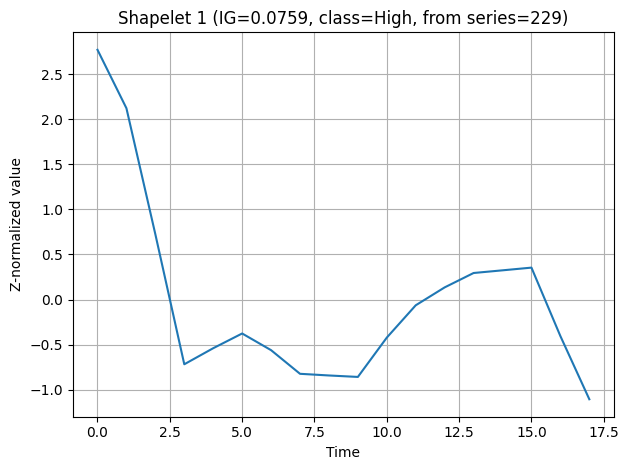

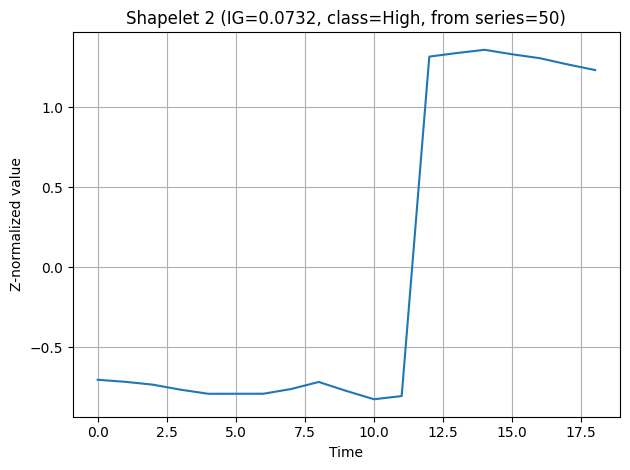

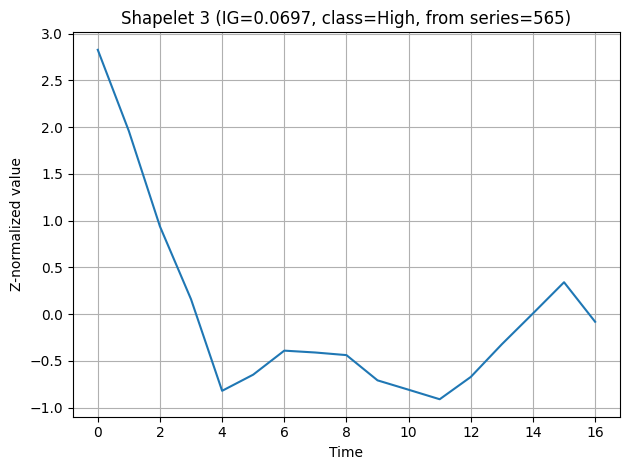

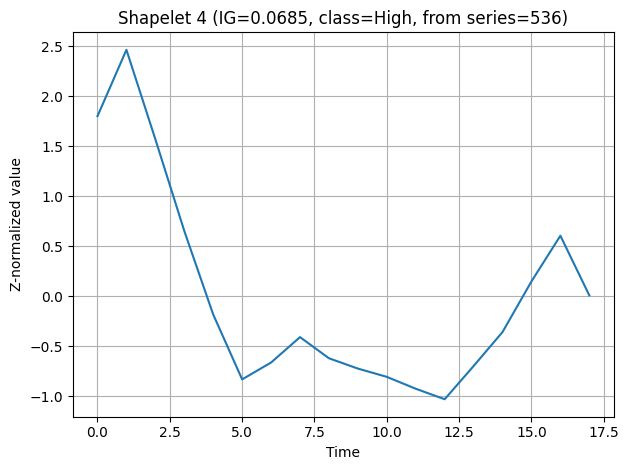

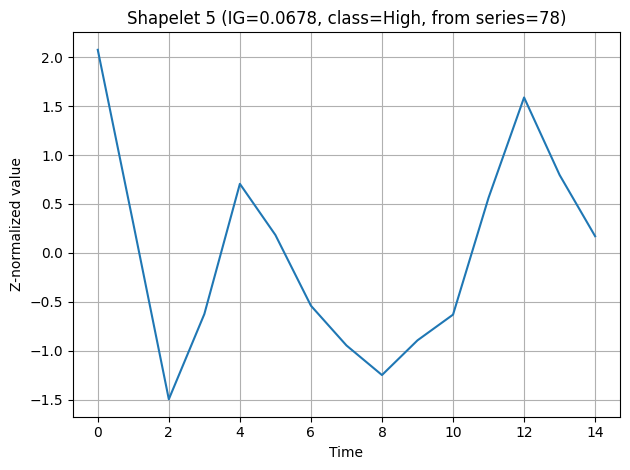

In [ ]:
# Estrai shapelets come lista di dizionari
#QUESTE SONO PRESE DA RandomShapeletTransform
shapelet_list = []

for tup in stt.shapelets:
    shapelet_info = {
        'information_gain': tup[0],
        'length': tup[1],
        'start_pos': tup[2],
        'dimension': tup[3],
        'series_id': tup[4],
        'class_val': tup[5],
        'shapelet': tup[6]
    }
    shapelet_list.append(shapelet_info)

# Crea DataFrame ordinabile
df_shapelets = pd.DataFrame(shapelet_list)

# Ordina per information gain decrescente
df_sorted = df_shapelets.sort_values(by='information_gain', ascending=False)

# Visualizza le top 5 shapelet
for i in range(5):
    shp = df_sorted.iloc[i]
    plt.figure()
    plt.plot(shp['shapelet'])
    plt.title(f"Shapelet {i+1} (IG={shp['information_gain']:.4f}, class={shp['class_val']}, from series={shp['series_id']})")
    plt.xlabel("Time")
    plt.ylabel("Z-normalized value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


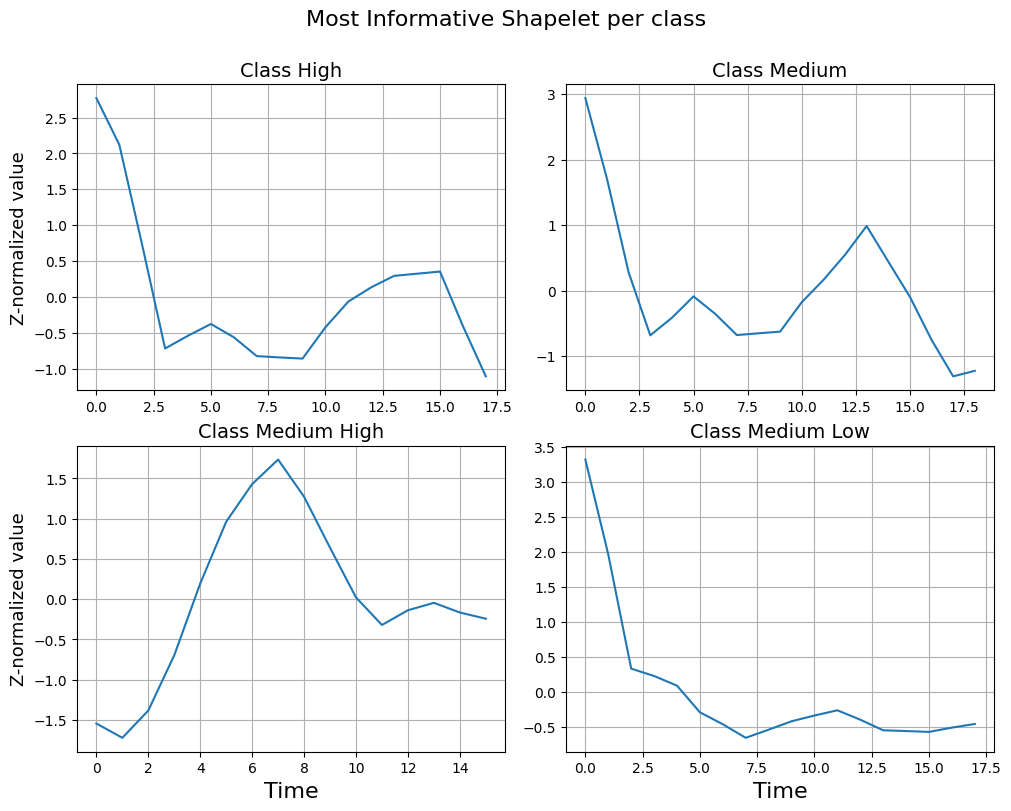

In [110]:
# Raggruppa per classe e prendi la shapelet con il massimo IG
top_per_class = df_shapelets.sort_values(by='information_gain', ascending=False).groupby('class_val').first().reset_index()

# Crea figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

for i, (idx, row) in enumerate(top_per_class.iterrows()):
    ax = axes[i]
    ax.plot(row['shapelet'])
    ax.set_title(f"Class {row['class_val']}", fontsize=14)

    # Solo la prima colonna ha label Y (indice 0 e 2)
    if i % 2 == 0:
        ax.set_ylabel("Z-normalized value", fontsize=13)
    else:
        ax.set_ylabel("")

    # Solo la seconda riga ha label X (indice 2 e 3)
    if i >= 2:
        ax.set_xlabel("Time", fontsize=16)
    else:
        ax.set_xlabel("")

    ax.grid(True)

# Disattiva eventuali subplot vuoti
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Most Informative Shapelet per class\n", fontsize=16)
plt.show()


### GRADIENT BASED

In [111]:
from sktime.classification.shapelet_based import ShapeletLearningClassifierPyts

In [112]:
sl = ShapeletLearningClassifierPyts(n_shapelets_per_size=0.14, random_state=100)

In [113]:
# Step 1: selezione dati
X_raw = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

# Step 2: conversione in formato sktime
X_nested = from_2d_array_to_nested(X_raw)

# Step 3: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_nested, y_array, test_size=0.3, random_state=100, stratify=y_array
)

In [114]:
%%time
sl.fit(X_train, y_train)

CPU times: total: 1min 8s
Wall time: 35.1 s


ShapeletLearningClassifierPyts(n_shapelets_per_size=0.14, random_state=100)

In [115]:
sl.score(X_test, y_test)

0.4310850439882698

In [116]:
y_pred = sl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4310850439882698
F1-score [0.50420168 0.52409639 0.         0.        ]
              precision    recall  f1-score   support

        High       0.48      0.53      0.50       113
      Medium       0.40      0.75      0.52       116
 Medium High       0.00      0.00      0.00        70
  Medium Low       0.00      0.00      0.00        42

    accuracy                           0.43       341
   macro avg       0.22      0.32      0.26       341
weighted avg       0.30      0.43      0.35       341



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Nearest Neighbors

In [51]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sktime.distances import distance
from sktime.distances import LowerBounding

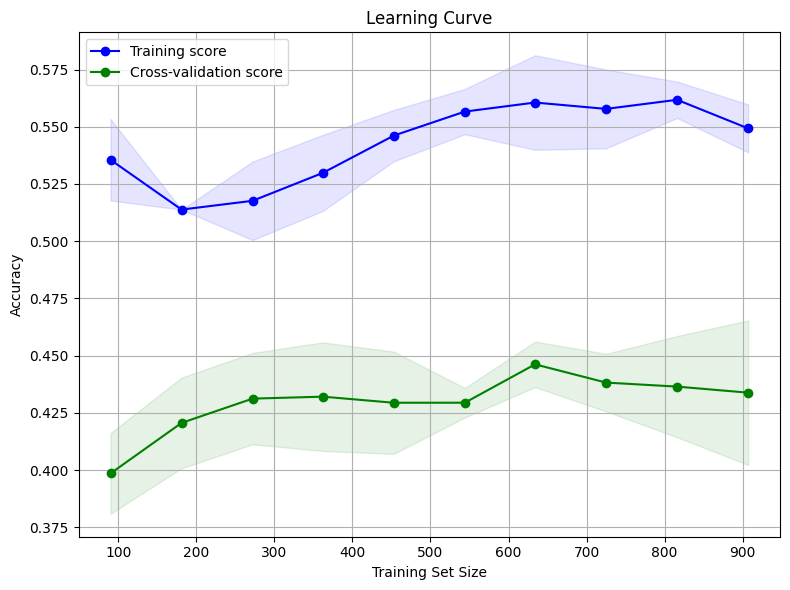

In [79]:
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sklearn.model_selection import learning_curve

X_nested = from_2d_array_to_nested(X)


train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsTimeSeriesClassifier(distance="euclidean", n_neighbors=9),
    X=X_nested,
    y=y_array,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
knn = KNeighborsTimeSeriesClassifier(distance="euclidean")

In [53]:
grid = GridSearchCV(
    estimator=knn,
    param_grid={"n_neighbors": [3, 5, 7, 9, 11]},
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
)

In [54]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsTimeSeriesClassifier(distance='euclidean'),
             n_jobs=-1, param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [55]:
grid.best_params_

{'n_neighbors': 9}

In [56]:
grid.score(X_test, y_test)

0.4604105571847507

In [57]:
y_pred = grid.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4604105571847507
F1-score [0.54545455 0.53424658 0.17391304 0.17857143]
              precision    recall  f1-score   support

        High       0.51      0.58      0.55       113
      Medium       0.44      0.67      0.53       116
 Medium High       0.36      0.11      0.17        70
  Medium Low       0.36      0.12      0.18        42

    accuracy                           0.46       341
   macro avg       0.42      0.37      0.36       341
weighted avg       0.44      0.46      0.42       341



In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, average_precision_score

In [60]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], shape=(341, 4))

In [61]:
# Return probability estimates for the test data X.
y_test_pred_proba_knn = grid.predict_proba(X_test)

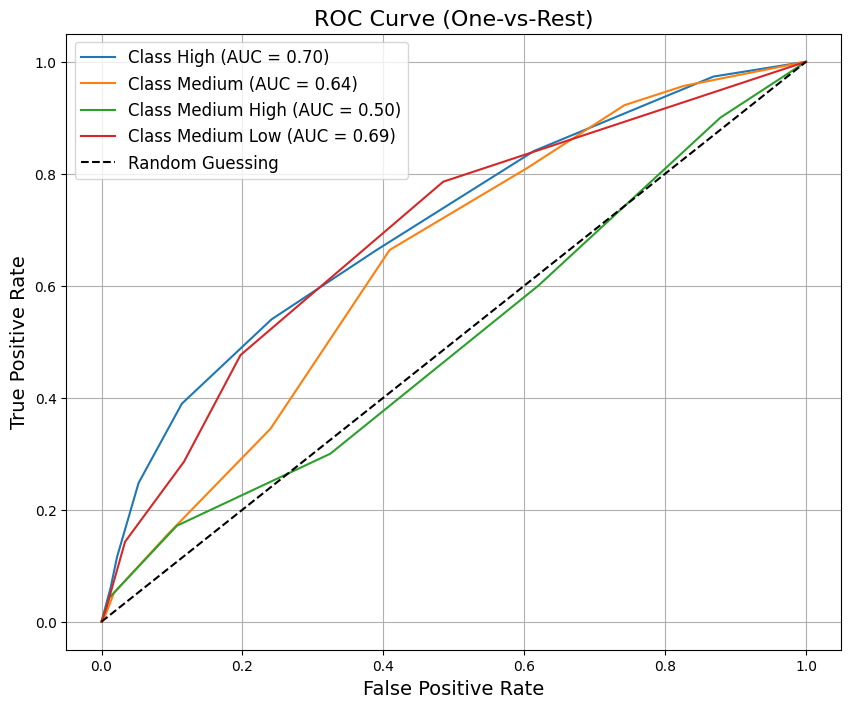

In [62]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba_knn[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba_knn[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

In [63]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba_knn, multi_class="ovr", average="macro")

np.float64(0.6356871867944303)

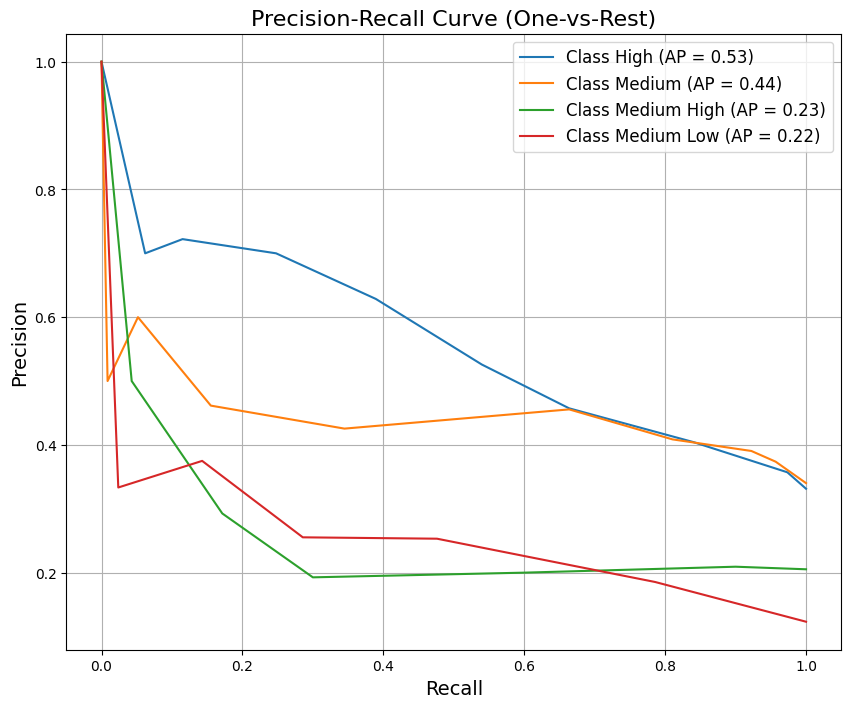

In [64]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba_knn[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba_knn[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

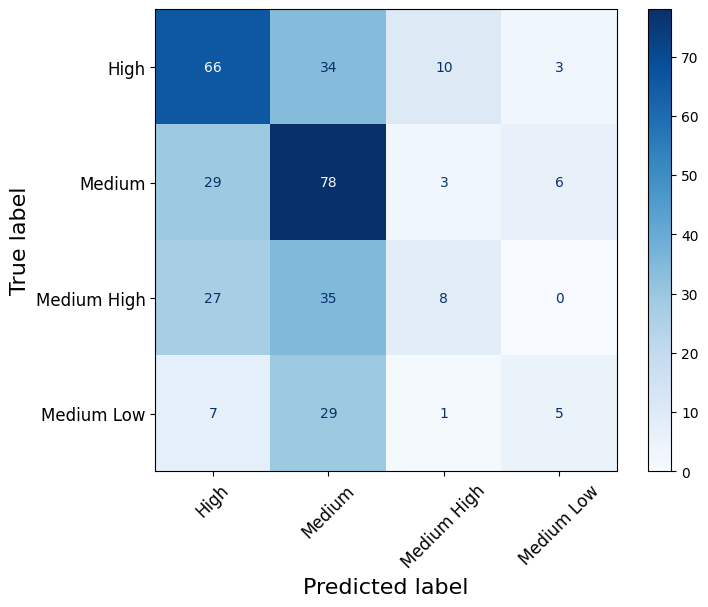

In [66]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Titolo e label con font personalizzato
# ax.set_title("Confusion Matrix\n", fontdict={'size': 18})
ax.set_xlabel("Predicted label", fontdict={'size': 16})
ax.set_ylabel("True label", fontdict={'size': 16})

# Dimensione dei tick
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.show()

In [68]:
knn_dtw = KNeighborsTimeSeriesClassifier(distance="dtw", distance_params={"window": 0.07})

In [69]:
grid_dtw = GridSearchCV(
    estimator=knn_dtw,
    param_grid={"n_neighbors": [1, 3, 5, 7, 9, 11]},
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
)

In [70]:
grid_dtw.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsTimeSeriesClassifier(distance_params={'window': 0.07}),
             n_jobs=-1, param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [71]:
grid_dtw.best_params_

{'n_neighbors': 11}

In [72]:
grid_dtw.score(X_test, y_test)

0.41642228739002934

In [73]:
y_pred_dtw = grid_dtw.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dtw))
print('F1-score %s' % f1_score(y_test, y_pred_dtw, average=None))
print(classification_report(y_test, y_pred_dtw))

Accuracy 0.41642228739002934
F1-score [0.51046025 0.51369863 0.06315789 0.10714286]
              precision    recall  f1-score   support

        High       0.48      0.54      0.51       113
      Medium       0.43      0.65      0.51       116
 Medium High       0.12      0.04      0.06        70
  Medium Low       0.21      0.07      0.11        42

    accuracy                           0.42       341
   macro avg       0.31      0.33      0.30       341
weighted avg       0.36      0.42      0.37       341



In [74]:
# Return probability estimates for the test data X.
y_test_pred_proba_knnd = grid_dtw.predict_proba(X_test)

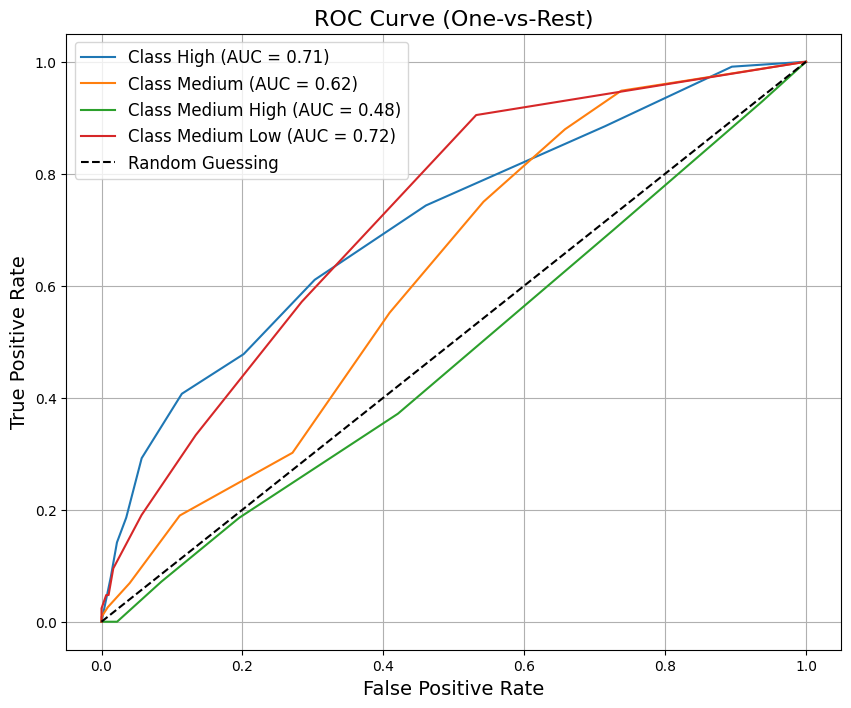

In [75]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba_knnd[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba_knnd[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

In [76]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba_knnd, multi_class="ovr", average="macro")

np.float64(0.6317076570808031)

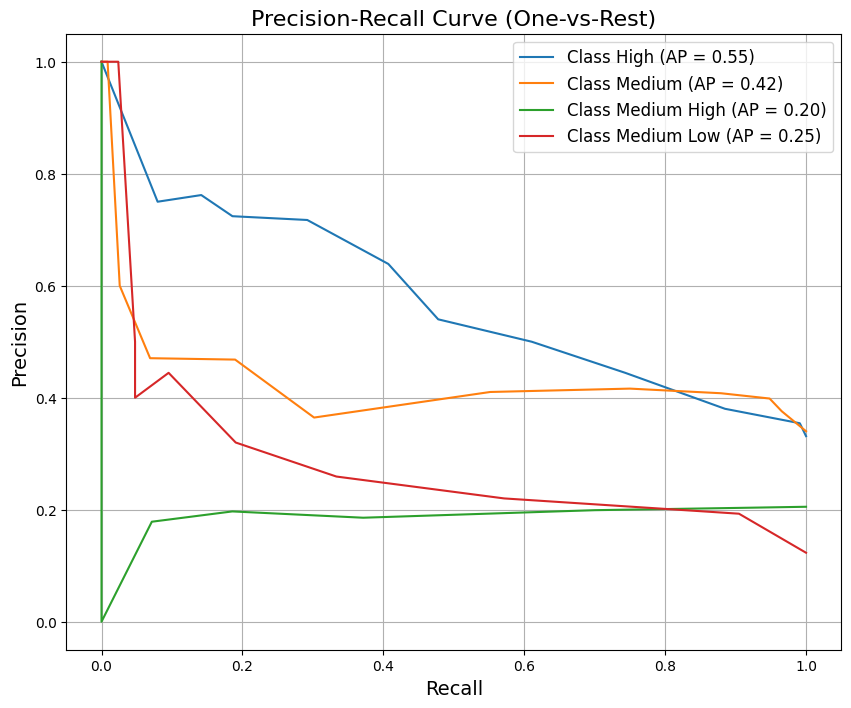

In [77]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba_knnd[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba_knnd[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

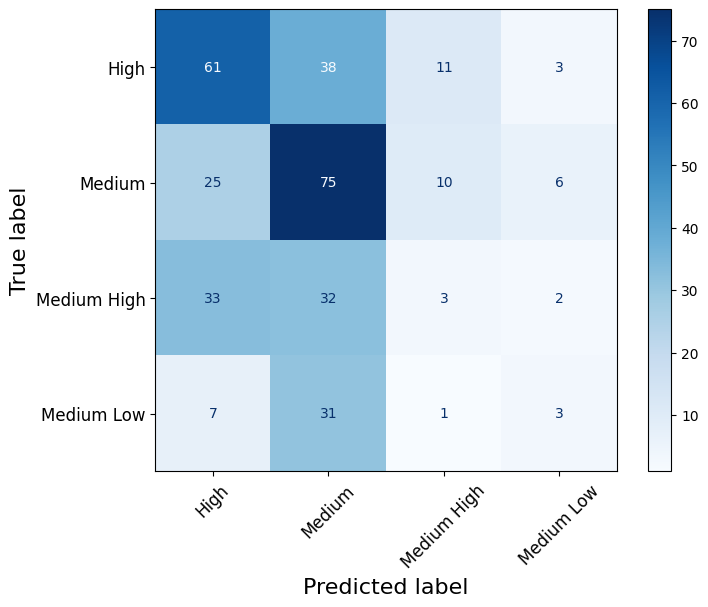

In [78]:
cm = confusion_matrix(y_test, y_pred_dtw, labels=grid_dtw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_dtw.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Titolo e label con font personalizzato
# ax.set_title("Confusion Matrix\n", fontdict={'size': 18})
ax.set_xlabel("Predicted label", fontdict={'size': 16})
ax.set_ylabel("True label", fontdict={'size': 16})

# Dimensione dei tick
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.show()

### (MINI)ROCKET (KERNEL - BASED)

In [141]:
from sktime.transformations.panel.rocket import Rocket
from sktime.classification.kernel_based import RocketClassifier

In [144]:
rocket = RocketClassifier(random_state=0, rocket_transform="minirocket", use_multivariate='no')
rocket.fit(X_train, y_train)
rocket.score(X_test, y_test)

0.44868035190615835

In [145]:
y_pred_rocket = rocket.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rocket))
print('F1-score %s' % f1_score(y_test, y_pred_rocket, average=None))
print(classification_report(y_test, y_pred_rocket))

Accuracy 0.44868035190615835
F1-score [0.58369099 0.5        0.11764706 0.26865672]
              precision    recall  f1-score   support

        High       0.57      0.60      0.58       113
      Medium       0.43      0.60      0.50       116
 Medium High       0.19      0.09      0.12        70
  Medium Low       0.36      0.21      0.27        42

    accuracy                           0.45       341
   macro avg       0.39      0.38      0.37       341
weighted avg       0.42      0.45      0.42       341



### WEASEL (DICTIONARY - BASED)

Due versioni di Weasel: la prima con un metodo che permette di calcolare le probabilità per la costruzione della ROC, il secondo no. Il primo è più lento e offre prestazioni peggiori.

In [13]:
from sktime.classification.dictionary_based import WEASEL

In [25]:
weasel = WEASEL(random_state=100, support_probabilities=True)

In [26]:
param_grid = {
    "alphabet_size": [2, 4, 6, 8],
    "window_inc": [1, 3, 5]
}

grid_weasel = GridSearchCV(
    estimator=weasel,
    param_grid=param_grid,
    scoring='accuracy',
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
)

In [27]:
grid_weasel.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=WEASEL(random_state=100, support_probabilities=True),
             n_jobs=-1,
             param_grid={'alphabet_size': [2, 4, 6, 8],
                         'window_inc': [1, 3, 5]},
             scoring='accuracy')

In [28]:
grid_weasel.best_params_

{'alphabet_size': 8, 'window_inc': 1}

In [29]:
grid_weasel.score(X_test, y_test)

0.4633431085043988

In [30]:
y_pred_weasel = grid_weasel.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_weasel))
print('F1-score %s' % f1_score(y_test, y_pred_weasel, average=None))
print(classification_report(y_test, y_pred_weasel))

Accuracy 0.4633431085043988
F1-score [0.5907173  0.48148148 0.26785714 0.25396825]
              precision    recall  f1-score   support

        High       0.56      0.62      0.59       113
      Medium       0.42      0.56      0.48       116
 Medium High       0.36      0.21      0.27        70
  Medium Low       0.38      0.19      0.25        42

    accuracy                           0.46       341
   macro avg       0.43      0.40      0.40       341
weighted avg       0.45      0.46      0.45       341



In [32]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], shape=(341, 4))

In [33]:
# Return probability estimates for the test data X.
y_test_pred_proba = grid_weasel.predict_proba(X_test)

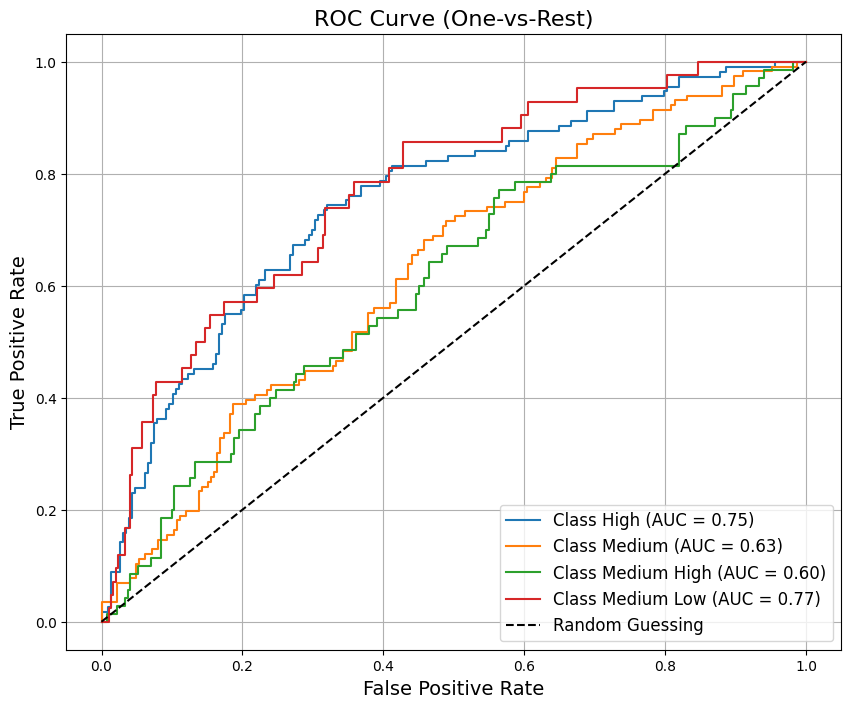

In [34]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

In [35]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.6885291535287077)

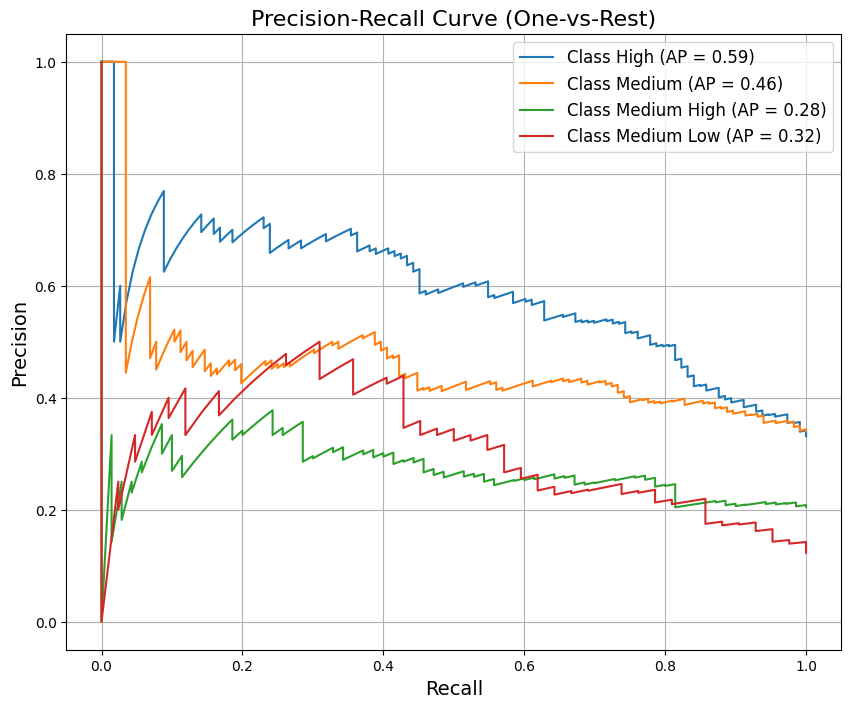

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

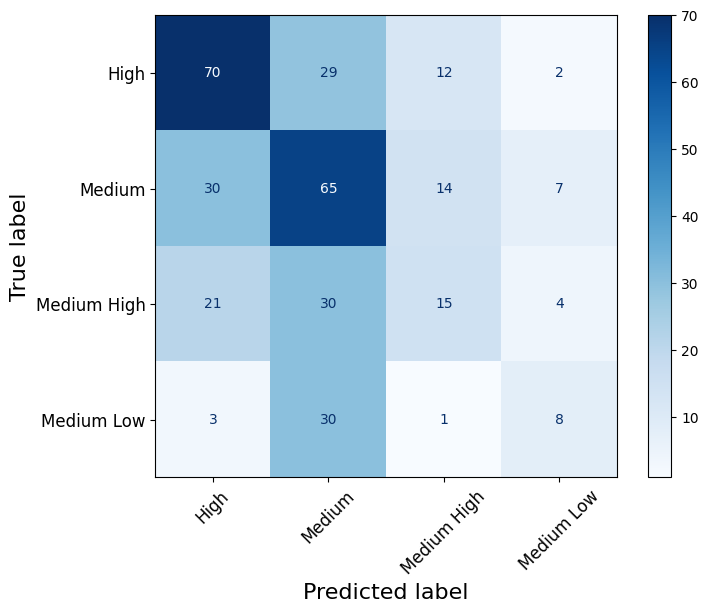

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_weasel, labels=grid_weasel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_weasel.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Titolo e label con font personalizzato
# ax.set_title("Confusion Matrix\n", fontdict={'size': 18})
ax.set_xlabel("Predicted label", fontdict={'size': 16})
ax.set_ylabel("True label", fontdict={'size': 16})

# Dimensione dei tick
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.show()

Segue un'altra versione di WEASEL che usa un classificatore che non permette di calcolare le probabilità, quindi non può essere utilizzato per la roc-curve, però è più preciso e più veloce.

In [44]:
weasel_np = WEASEL(random_state=100)

In [45]:
param_grid_np = {
    "alphabet_size": [2, 4, 6, 8],
    "window_inc": [1, 3, 5]
}

grid_weasel_np = GridSearchCV(
    estimator=weasel_np,
    param_grid=param_grid_np,
    scoring='accuracy',
    cv=KFold(n_splits=5, shuffle=True, random_state=0),
    n_jobs=-1,
)

In [46]:
grid_weasel_np.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=WEASEL(random_state=100), n_jobs=-1,
             param_grid={'alphabet_size': [2, 4, 6, 8],
                         'window_inc': [1, 3, 5]},
             scoring='accuracy')

In [47]:
grid_weasel_np.best_params_

{'alphabet_size': 2, 'window_inc': 5}

In [48]:
grid_weasel_np.score(X_test, y_test)

0.4838709677419355

In [49]:
y_pred_weasel_np = grid_weasel_np.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_weasel_np))
print('F1-score %s' % f1_score(y_test, y_pred_weasel_np, average=None))
print(classification_report(y_test, y_pred_weasel_np))

Accuracy 0.4838709677419355
F1-score [0.57613169 0.53333333 0.29310345 0.29411765]
              precision    recall  f1-score   support

        High       0.54      0.62      0.58       113
      Medium       0.49      0.59      0.53       116
 Medium High       0.37      0.24      0.29        70
  Medium Low       0.38      0.24      0.29        42

    accuracy                           0.48       341
   macro avg       0.45      0.42      0.42       341
weighted avg       0.47      0.48      0.47       341



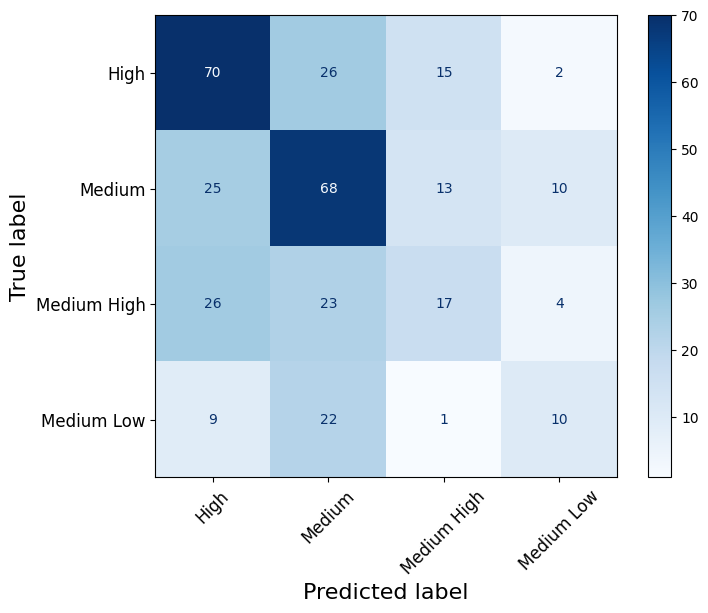

In [50]:
cm = confusion_matrix(y_test, y_pred_weasel_np, labels=grid_weasel_np.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_weasel_np.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Titolo e label con font personalizzato
# ax.set_title("Confusion Matrix\n", fontdict={'size': 18})
ax.set_xlabel("Predicted label", fontdict={'size': 16})
ax.set_ylabel("True label", fontdict={'size': 16})

# Dimensione dei tick
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.show()

### CIF (canonical interval forest) (INTERVAL - BASED)
Sconsiglio di eseguirlo. L'accuracy generale è leggermente più alta rispetto a quella di Weasel (che a questo punto del notebook è il miglior), ma il fit dura circa 20 minuti, mentre weasel 1.25. Inoltre la classe Medium-High ha performance nettamente peggiori.

In [174]:
from sktime.classification.interval_based import CanonicalIntervalForest

In [175]:
cif = CanonicalIntervalForest(min_interval=3)

In [ ]:
cif.fit(X_train, y_train)
# 20 minuti circa

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  wa

CanonicalIntervalForest()

In [177]:
cif.score(X_test, y_test)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


0.4897360703812317

In [178]:
y_pred_cif = cif.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_cif))
print('F1-score %s' % f1_score(y_test, y_pred_cif, average=None))
print(classification_report(y_test, y_pred_cif))

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sktime\transformations\panel\catch22.py:390: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


Accuracy 0.49266862170087977
F1-score [0.59555556 0.55696203 0.07317073 0.33898305]
              precision    recall  f1-score   support

        High       0.60      0.59      0.60       113
      Medium       0.44      0.76      0.56       116
 Medium High       0.25      0.04      0.07        70
  Medium Low       0.59      0.24      0.34        42

    accuracy                           0.49       341
   macro avg       0.47      0.41      0.39       341
weighted avg       0.47      0.49      0.44       341



### HYDRA (HYBRID - MODEL)

In [182]:
from aeon.classification.convolution_based import HydraClassifier

In [183]:
hydra = HydraClassifier(n_kernels=100, random_state=100)  # increase for better performance

In [190]:
# Step 1: selezione dati
X = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

# Step 1: conversione in lista di array per aeon
X_list = [series for series in X]  # ogni riga è una serie da 100 valori

# Step 2: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_list, y_array, test_size=0.3, random_state=100, stratify=y_array
)

In [191]:
hydra.fit(X_train, y_train)
hydra.score(X_test, y_test)

NameError: name '_HydraInternal' is not defined

In [ ]:
y_pred_rh = hydra.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rh))
print('F1-score %s' % f1_score(y_test, y_pred_rh, average=None))
print(classification_report(y_test, y_pred_rh))